In [1]:
import numpy as np
import math
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt 


In [2]:
def load_data(path):
    data = []
    with open(path) as f:
        for line in f:
            data += [np.array([np.int(i) for i in line.split(' ')], dtype=np.int)]
    return np.array(data)
    
first_split = load_data("c1.txt")
second_split = load_data("c2.txt")

In [3]:
def create_groups(split, n_groups):
    indexes = np.random.choice(split.shape[0], split.shape[0])
    sub_sample = split[indexes, :]
    groups = np.split(sub_sample, n_groups)
    
    return groups

In [4]:
def calculate_ctr(groups):
    CTR = []
    for i in range(len(groups)):
        number_of_non_click_sessions = np.count_nonzero(np.all((groups[i] == 0), axis=1))
        cur_CTR = (groups[i].shape[0] - number_of_non_click_sessions) / groups[i].shape[0]
        CTR.append(cur_CTR)
    return CTR

In [5]:
def calculate_cpq(groups):
    CPQ = []
    for i in range(len(groups)):
        cur_CPQ = groups[i].sum(axis=1).mean()
        CPQ.append(cur_CPQ)
    return CPQ

In [6]:
def check_hypotesis(first_split, second_split, n_iter, objects_in_grops):

    count = {}
    count['CTR'] = 0
    count['CPQ'] = 0
    fig = plt.figure(figsize = (14,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ctr_first_split_arr = []
    cpq_first_split_arr = []
    ctr_second_split_arr = []
    cpq_second_split_arr = []
    ax1.set_title('CPQ comparsion')
    ax2.set_title('CTR comparsion')

    for i in range(n_iter):
        groups_first_split = create_groups(first_split, first_split.shape[0] // objects_in_grops)
        groups_second_split = create_groups(second_split, second_split.shape[0] // objects_in_grops)
        ctr_first_split = calculate_ctr(groups_first_split)
        ctr_second_split = calculate_ctr(groups_second_split)
        ctr_first_split_arr.append(np.mean(ctr_first_split))
        ctr_second_split_arr.append(np.mean(ctr_second_split))
        t, _ = stats.ttest_ind(ctr_first_split,ctr_second_split,equal_var=False)
        count['CTR'] += t > 1.96   
        cpq_first_split = calculate_cpq(groups_first_split)
        cpq_second_split = calculate_cpq(groups_second_split)
        cpq_first_split_arr.append(np.mean(cpq_first_split))
        cpq_second_split_arr.append(np.mean(cpq_second_split))
        t, _ = stats.ttest_ind(cpq_first_split,cpq_second_split,equal_var=False)
        count['CPQ'] += t > 1.96
    ax1.plot(cpq_first_split_arr, label = 'first')
    ax1.plot(cpq_second_split_arr, label = 'second')
    ax2.plot(ctr_first_split_arr, label = 'first')
    ax2.plot(ctr_second_split_arr, label = 'second')
    ax1.legend(loc = 'best')
    ax2.legend(loc = 'best')
    plt.show()
    return count

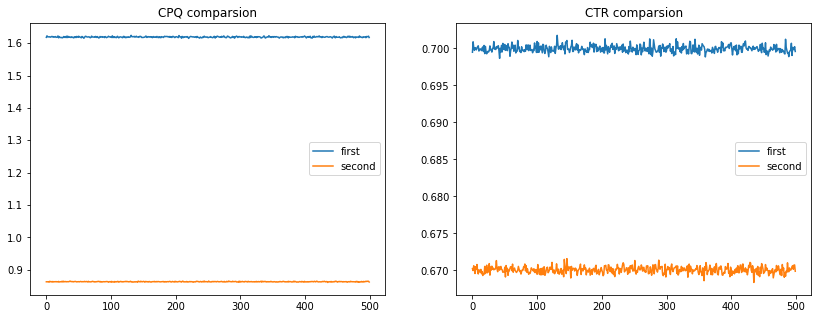

In [7]:
count_H1 = check_hypotesis(first_split, second_split, 500, 100)

In [8]:
print('CTR')
print('ASL = ', count_H1['CTR'] / 500)

print('CPQ')
print('ASL = ', count_H1['CPQ'] / 500)

CTR
ASL =  1.0
CPQ
ASL =  1.0


Так как ASL = 1, то на всех итерациях мы отвергли гипотезу об эквивалентности сплитов. При этом измеряемые метрики лучше у первого сплита, значит, качество у него, скорее всего, выше